## K nearest neighbors classification with python code - exercise

1. Classify digits (0 to 9) using KNN classifier. You can use different values for k neighbors and need to figure out a value of K that gives you a maximum score. You can manually try different values of K or use gridsearchcv 
 1. Plot confusion matrix
 1. Plot classification report
 
 exercise taken from [Codebasics youtube channel](https://www.youtube.com/watch?v=CQveSaMyEwM&list=PLeo1K3hjS3uvCeTYTeyfe0-rN5r8zn9rw&index=19&ab_channel=codebasics)

---

In [50]:
from sklearn.datasets import load_digits
import pandas as pd

***load the data set of digits***


digits = load_digits()

In [9]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [10]:
digits.feature_names[:5]

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4']

In [11]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [66]:
digits.target[:21]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0])

**it can be seen that the target is in sequences from 0 to 9**

---
### Load the data set to a dataframe

In [36]:
df = pd.DataFrame(digits.data, index=digits.target)

In [39]:
df['target'] = digits.target
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,5
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0,6
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0,7
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0,8
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9


---
### Train/test split

In [40]:
X = df.drop('target',axis=1)
y = df.target

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10, stratify=y)

---
### Fit classifier

In [46]:
from sklearn.neighbors import KNeighborsClassifier
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1,11)

In [48]:
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

<Figure size 50x50 with 0 Axes>

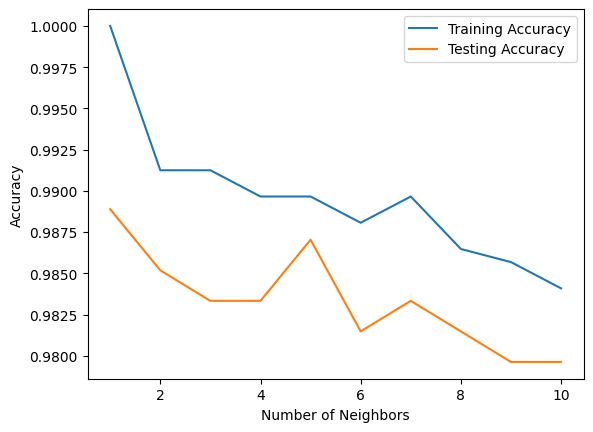

In [61]:
import matplotlib.pyplot as plt
plt.figure(figsize=(0.5,0.5))
plt.figure("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

***in the graph we can see that the maximum score is for 5 neighbors***

---
### in the graph we can see that the maximum score is for 5 neighborsconfusion matrix

In [55]:
from sklearn.metrics import confusion_matrix
knn = KNeighborsClassifier(n_neighbors=5) #maximun score: 5
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[54,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 55,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 53,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 53,  0,  0,  0,  1,  1,  0],
       [ 0,  1,  0,  0, 52,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 55,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 54,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 53,  0,  1],
       [ 0,  1,  0,  1,  0,  0,  0,  0, 50,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 54]])

Text(33.22222222222222, 0.5, 'Truth')

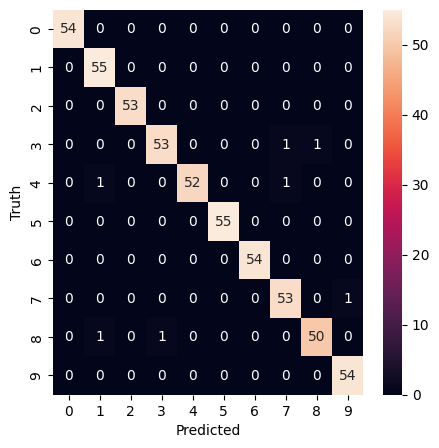

In [65]:
import seaborn as sn
plt.figure(figsize=(5, 5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')